<a href="https://colab.research.google.com/github/packtpublishing/Machine-Learning-for-Imbalanced-Data/blob/main/chapter02/chapter02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting helper function

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_dataset(X, y, label):
    X = pd.DataFrame(X, columns=["feature_1", "feature_2"])
    y = pd.Series(y)

    print(y.value_counts())

    markers = {1: "X", 0: "v"}
    sns.scatterplot(
        data=X, x="feature_1", y="feature_2", hue=y, style=y, markers=markers
    )

    plt.title(label)
    plt.ylim(-5, 4)
    plt.xlim(-3, 3)

    plt.show()

#Create dataset

0    9900
1     100
Name: count, dtype: int64


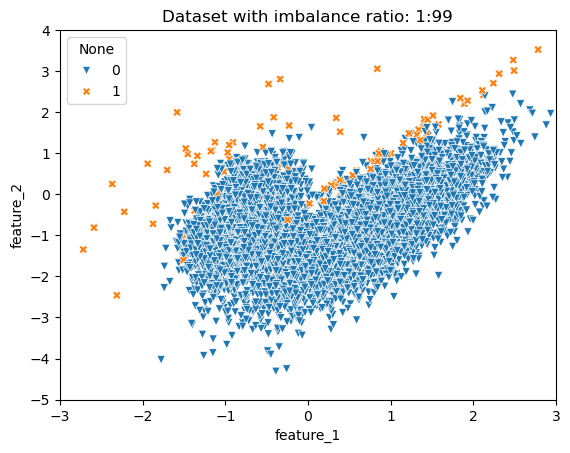

In [3]:
from sklearn.datasets import make_classification
import pandas as pd

X, y = make_classification(
    n_samples=10000,
    n_features=2,
    n_redundant=0,
    n_classes=2,
    flip_y=0,
    n_clusters_per_class=2,
    class_sep=0.79,
    weights=[0.99],
    random_state=81,
)

plot_dataset(X, y, "Dataset with imbalance ratio: 1:99")

#RandomOverSampler

Resampled dataset shape Counter({0: 9900, 1: 9900})
0    9900
1    9900
Name: count, dtype: int64


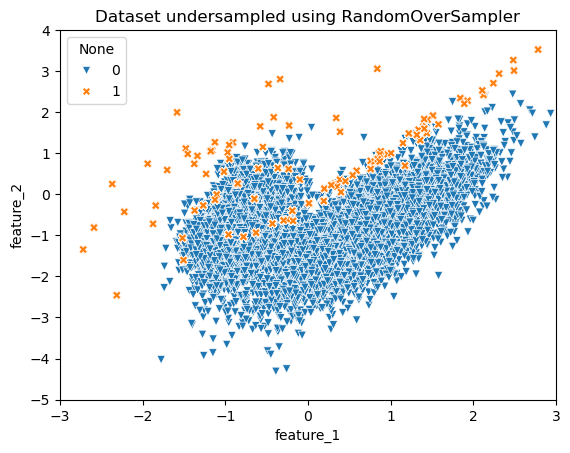

In [4]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(sampling_strategy=1.0, random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print("Resampled dataset shape %s" % Counter(y_res))

plot_dataset(X_res, y_res, "Dataset undersampled using RandomOverSampler")

Resampled dataset shape Counter({0: 9900, 1: 9900})
0    9900
1    9900
Name: count, dtype: int64


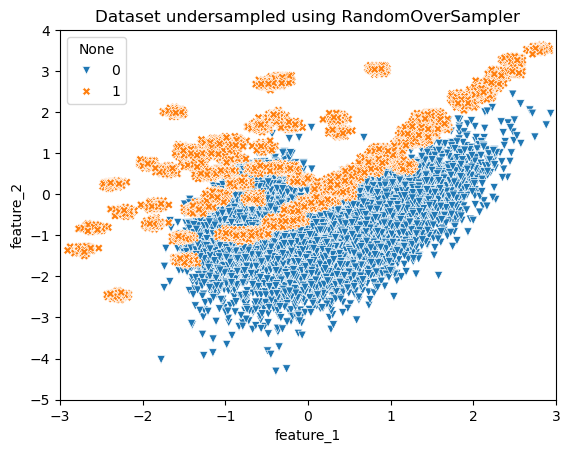

In [5]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(sampling_strategy=1.0, random_state=42, shrinkage=0.2)
X_res, y_res = ros.fit_resample(X, y)
print("Resampled dataset shape %s" % Counter(y_res))

plot_dataset(X_res, y_res, "Dataset undersampled using RandomOverSampler")

#SMOTE

Resampled dataset shape Counter({0: 9900, 1: 9900})
0    9900
1    9900
Name: count, dtype: int64


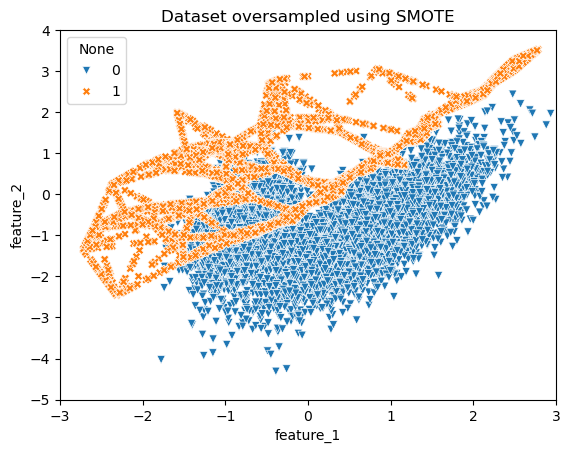

In [5]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X, y)
print("Resampled dataset shape %s" % Counter(y_res))

plot_dataset(X_res, y_res, "Dataset oversampled using SMOTE")

# Borderline-SMOTE

Before:  [(0, 9900), (1, 100)]
After:  [(0, 9900), (1, 9900)]
0    9900
1    9900
Name: count, dtype: int64


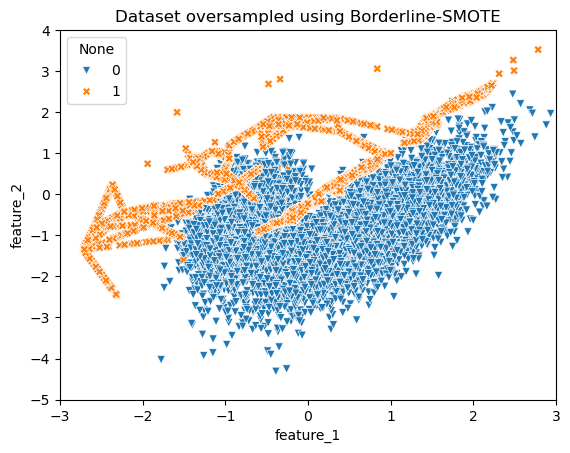

In [6]:
print("Before: ", sorted(Counter(y).items()))
from imblearn.over_sampling import BorderlineSMOTE

X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X, y)
print("After: ", sorted(Counter(y_resampled).items()))

plot_dataset(X_resampled, y_resampled, "Dataset oversampled using Borderline-SMOTE")

# ADASYN

[(0, 9900), (1, 9900)]
0    9900
1    9900
Name: count, dtype: int64


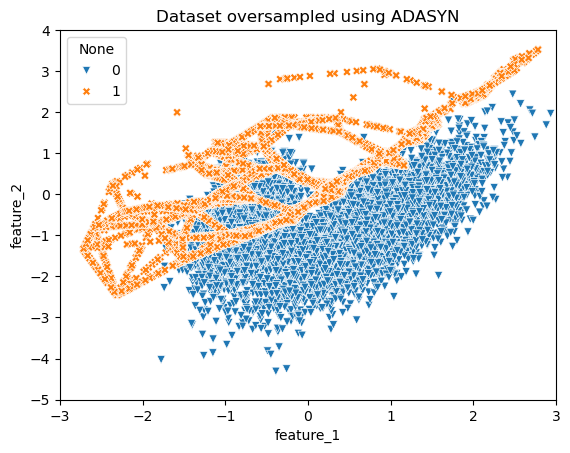

In [7]:
from imblearn.over_sampling import ADASYN

X_resampled, y_resampled = ADASYN().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

plot_dataset(X_resampled, y_resampled, "Dataset oversampled using ADASYN")